# Basic Library Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Iris Data Set Classification

Let’s use the iris dataset to illustrate Decision Tree and Neural Nets. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

<img src="iris figure.png" width="800">

## Load Iris Data

In [13]:
from sklearn.datasets import load_iris

# load iris data
iris_data = load_iris()

list(iris_data.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [3]:
X = iris_data['data']
y = iris_data['target']

feature_names = iris_data['feature_names']
names = iris_data['target_names']

In [4]:
# print the column values
print('Example data: ')
print('Column names:')
print(feature_names)
print('Values:')
print(X[:5])

# print the label values
print('Example labels: ')
print(y[:5])
print('Labels names (0, 1, 2):')
print(names)

Example data: 
Column names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Values:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]
Labels names (0, 1, 2):
['setosa' 'versicolor' 'virginica']


## Visualize Iris Data

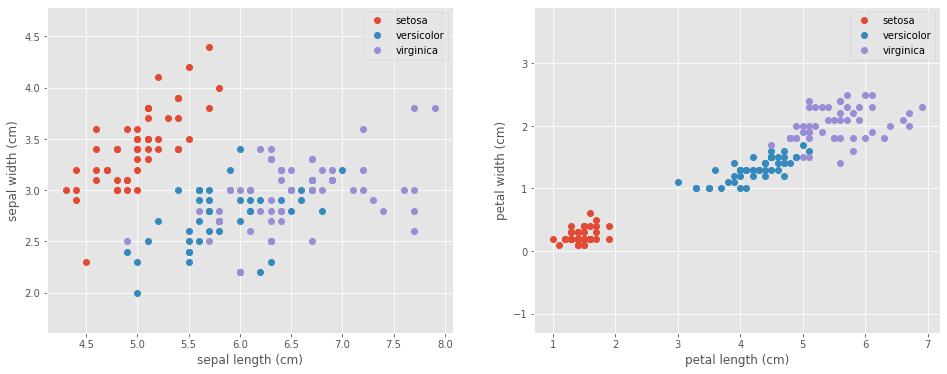

In [34]:
# Visualize the data sets
plt.figure(figsize=(16, 6))

# left plot: sepal length vs sepal width
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

# right plot: petal length vs petal width
plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

# Decision Tree

To understand Decision Trees, let’s just build one and take a look at how it makes predictions. The following code trains a `DecisionTreeClassifier` on the iris dataset

In [21]:
from sklearn import tree
import graphviz

In [34]:
tree_clf = tree.DecisionTreeClassifier(max_depth=4) # set the maximum depth of the tree is 2

tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

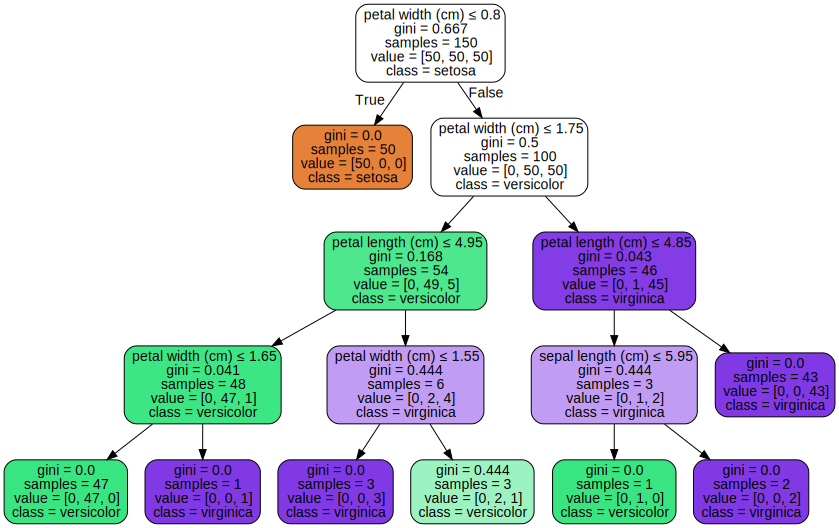

In [35]:
# Visualize the trained Decision Tree
dot_data = tree.export_graphviz(tree_clf, 
                                out_file=None, 
                                feature_names=feature_names,  
                                class_names=names,  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

# Neural Nets 

Here, we show a simple neural network written in Keras (TensorFlow backend) to classify the Iris data. 

**NOTE: You have to install `tensorflow` and `keras` before running the following codes**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


When we are using `keras` to train a Neural Net, first we should make sure that the target value (i.e., Y) has to be encoded. For example, if `y = [0, 0, 0, 1, 1, 1, 2, 2, 2]`, then it has to be converted to be `y = [[1,0,0], [1,0,0], [1,0,0], [0,1,0], [0,1,0], [0,1,0], [0,0,1], [0,0,1],[0,0,1]]` by one-hot encoding operation.

In [40]:
# One Hot encode the class labels
y_reshape = y.reshape(-1,1) # Convert data to a single column
encoder = OneHotEncoder(sparse=False, categories = 'auto')
y_onehot = encoder.fit_transform(y_reshape)

In [42]:
# Split the data for training (80%) and testing (20%)
train_x, test_x, train_y, test_y = train_test_split(X, y_onehot, test_size=0.20)

# Build the model
model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1')) #regular densely-connected NN layer.
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                50        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

Epoch 1/200
 - 0s - loss: 2.8311 - accuracy: 0.3250
Epoch 2/200
 - 0s - loss: 1.6708 - accuracy: 0.3250
Epoch 3/200
 - 0s - loss: 0.9029 - accuracy: 0.5417
Epoch 4/200
 - 0s - loss: 0.6654 - accuracy: 0.7667
Epoch 5/200
 - 0s - loss: 0.5969 - accuracy: 0.7750
Epoch 6/200
 - 0s - loss: 0.5506 - accuracy: 0.9167
Epoch 7/200
 - 0s - loss: 0.5146 - accuracy: 0.8583
Epoch 8/200
 - 0s - loss: 0.4844 - accuracy: 0.8333
Epoch 9/200
 - 0s - loss: 0.4559 - accuracy: 0.8667
Epoch 10/200
 - 0s - loss: 0.4323 - accuracy: 0.8833
Epoch 11/200
 - 0s - loss: 0.4171 - accuracy: 0.9667
Epoch 12/200
 - 0s - loss: 0.3981 - accuracy: 0.9167
Epoch 13/200
 - 0s - loss: 0.3864 - accuracy: 0.9333
Epoch 14/200
 - 0s - loss: 0.3734 - accuracy: 0.9583
Epoch 15/200
 - 0s - loss: 0.3637 - accuracy: 0.8667
Epoch 16/200
 - 0s - loss: 0.3526 - accuracy: 0.9833
Epoch 17/200
 - 0s - loss: 0.3403 - accuracy: 0.9500
Epoch 18/200
 - 0s - loss: 0.3318 - accuracy: 0.9583
Epoch 19/200
 - 0s - loss: 0.3292 - accuracy: 0.9750
Ep

Epoch 155/200
 - 0s - loss: 0.0586 - accuracy: 0.9833
Epoch 156/200
 - 0s - loss: 0.0605 - accuracy: 0.9833
Epoch 157/200
 - 0s - loss: 0.0711 - accuracy: 0.9750
Epoch 158/200
 - 0s - loss: 0.0584 - accuracy: 0.9750
Epoch 159/200
 - 0s - loss: 0.0554 - accuracy: 0.9833
Epoch 160/200
 - 0s - loss: 0.0628 - accuracy: 0.9750
Epoch 161/200
 - 0s - loss: 0.0535 - accuracy: 0.9750
Epoch 162/200
 - 0s - loss: 0.0679 - accuracy: 0.9750
Epoch 163/200
 - 0s - loss: 0.0615 - accuracy: 0.9750
Epoch 164/200
 - 0s - loss: 0.0625 - accuracy: 0.9833
Epoch 165/200
 - 0s - loss: 0.0574 - accuracy: 0.9833
Epoch 166/200
 - 0s - loss: 0.0567 - accuracy: 0.9750
Epoch 167/200
 - 0s - loss: 0.0647 - accuracy: 0.9750
Epoch 168/200
 - 0s - loss: 0.0641 - accuracy: 0.9750
Epoch 169/200
 - 0s - loss: 0.0543 - accuracy: 0.9750
Epoch 170/200
 - 0s - loss: 0.0558 - accuracy: 0.9750
Epoch 171/200
 - 0s - loss: 0.0569 - accuracy: 0.9833
Epoch 172/200
 - 0s - loss: 0.0611 - accuracy: 0.9750
Epoch 173/200
 - 0s - loss: 

In [44]:
# Test on unseen data
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

30/30 [==============================] - 0s 700us/step
Final test set loss: 0.110488
Final test set accuracy: 0.966667
